1. Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd 
data=pd.read_csv('glass.csv')
data

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [2]:
data.shape,data.columns

((18, 1),
 Index(['Prepare a model for glass classification using Random Forest'], dtype='object'))

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Prepare a model for glass classification using Random Forest  18 non-null     object
dtypes: object(1)
memory usage: 276.0+ bytes


In [4]:

# Remove rows with NaN values
data = data.dropna()

# Write the cleaned DataFrame back to a new CSV file
data.to_csv('cleaned_file.csv', index=False)
data

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [5]:
data.isnull().sum()

Prepare a model for glass classification using Random Forest    0
dtype: int64

In [6]:
data[data.duplicated()]

,Prepare a model for glass classification using Random Forest


In [7]:
data.drop_duplicates()

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


2: Data Visualization:

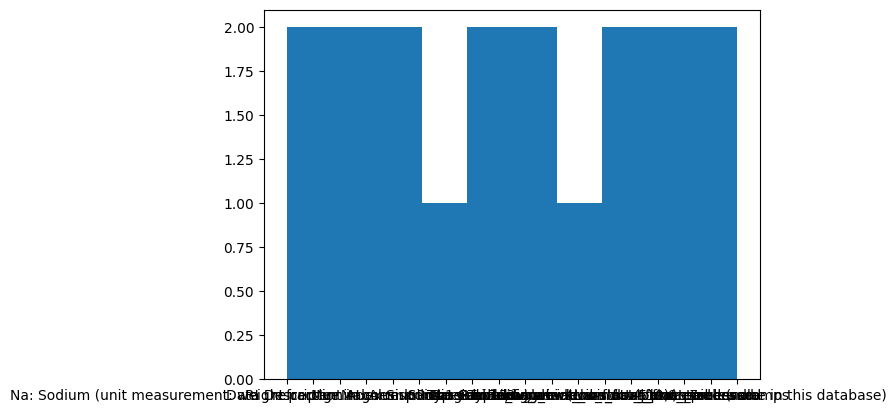

In [8]:
import matplotlib.pyplot as plt
plt.hist(data)
plt.show()

In [ ]:
import seaborn as sns
sns.pairplot(data)

In [ ]:
data.corr()

3.Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
data

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x,y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape,y_train.shape

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train,y_train

In [ ]:
print(x_train)
print(x_test)
print(x_train.dtypes)
print(x_test.dtypes)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
import numpy as np

print(np.isnan(x_train).any())
print(np.isnan(x_test).any())
#pip install --upgrade scikit-learn
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Ensure y_train is properly set
print(x_train, y_train)


4: Random Forest Model Implementation

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
clf=RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train,y_train)


In [ ]:
# Predict the labels of the test set
y_pred = clf.predict(x_train)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, clf.predict(x_test))
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, clf.predict(x_train))
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_pred,y_train)

In [ ]:
from sklearn.metrics import classification_report
classification_report(clf.predict(x_test),y_test)

5: Bagging and Boosting Methods

In [ ]:
# Bagging: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)



In [ ]:
# Boosting: AdaBoost Classifier
adb_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adb_clf.fit(x_train, y_train)
adb_pred = adb_clf.predict(x_test)
adb_accuracy = accuracy_score(y_test, adb_pred)
print("AdaBoost Classifier Accuracy:", adb_accuracy)


1. Explain Bagging and Boosting methods. How is it different from each other

Bagging :
Bagging involves training multiple instances of a base learning algorithm on different subsets of the training data, typically using random sampling with replacement (bootstrap sampling). Each model is trained independently, and then their predictions are combined through averaging (for regression) or voting (for classification). The idea behind bagging is to reduce variance and prevent overfitting by introducing diversity among the models. A popular example of bagging is the Random Forest algorithm, which uses bagging with decision trees as base learner

Boosting:
Boosting, on the other hand, involves training multiple weak learners sequentially, with each model trying to correct the mistakes made by its predecessor. Unlike bagging, where each model is trained independently, boosting learns from the mistakes of the previous models and gives more weight to the observations that were incorrectly predicted. Boosting algorithms typically assign different weights to the training instances based on their importance. Examples of boosting algorithms include AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), and XGBoost.s.

2. Explain how to handle imbalance in the data.
Resampling:
Over-sampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) create synthetic samples by interpolating between existing minority class samples.
Under-sampling: Decrease the number of instances in the majority class by randomly removing samples. However, this can lead to loss of information. Care should be taken to preserve the representativeness of the dataset.
Algorithmic Approaches:
Use algorithms that are robust to class imbalance, such as tree-based algorithms like Random Forest or gradient boosting machines (e.g., XGBoost, LightGBM). These algorithms are less sensitive to class imbalance because they partition the feature space based on class purity.
Utilize ensemble techniques like bagging and boosting, which can handle imbalanced data more effectively by combining multiple weak learners.
Cost-sensitive Learning:
Adjust the misclassification costs associated with different classes. By assigning higher misclassification costs to minority classes, classifiers can learn to prioritize correctly classifying these instances.
Some algorithms, like SVM (Support Vector Machines) and decision trees, allow for specifying class weights to penalize misclassification of minority classes.
Evaluation Metrics:
Choose appropriate evaluation metrics that are sensitive to class imbalance. Accuracy is not suitable for imbalanced datasets since it can be misleading. Instead, use metrics like precision, recall, F1-score, ROC-AUC (Receiver Operating Characteristic - Area Under the Curve), and PR-AUC (Precision-Recall Area Under the Curve).
Data Preprocessing:
Normalize or standardize the data to ensure that features are on a similar scale. This can help algorithms converge faster and perform better, especially for distance-based algorithms like SVM.
Feature engineering can also help in creating informative features that better discriminate between classes.
Ensemble Methods:
Ensemble methods like bagging and boosting can also be effective in handling imbalanced data. By combining multiple models trained on different subsets of the data, these methods can reduce the impact of class imbalance on model performance.
Advanced Techniques:
Deep learning techniques like attention mechanisms, class weighting, and focal loss have been developed to address imbalanced data in neural networks specifically.
Cost-sensitive learning algorithms, such as cost-sensitive SVM or cost-sensitive decision trees, explicitly consider the misclassification costs associated with different classes.